# Tiling example notebook

A notebook that shows how to use the `macrohet` metadata extraction and tiling functions. The image data we are working with is acquired as a mosaic of different single-frame acquisitions and requires tiling together for the downstream analysis. 

In [1]:
from macrohet import dataio, tile

#### Extract experiment information from image metadata files

There are two metadata files: an image metadata file and an experiment assay layout file. 

The image metadata contains all the information necessary to properly tile the images into mosaics. Typically a single mosaic will feature 9 tiles, but the tiling function is designed to work with any composition given the correct metadata.

The assay layout metadata shows the different experiment conditions for each image position across the whole experiment, referred to by a row and column enumeration. 

In [12]:
image_dir = '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Images/'
image_metadata_fn = '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Index.idx.xml'
metadata = dataio.read_harmony_metadata(image_metadata_fn)
assay_layout_metadata = '/mnt/DATA/sandbox/pierre_live_cell_data/outputs/Replication_IPSDM_GFP/Assaylayout/20210602_Live_cell_IPSDMGFP_ATB.xml'
assay_layout = dataio.read_harmony_metadata(assay_layout_metadata, assay_layout=True)
#assay_layout

Reading metadata XML file...


Extracting HarmonyV5 metadata:   0%|          | 0/113400 [00:00<?, ?it/s]

Extracting metadata complete!
Reading metadata XML file...
Extracting metadata complete!


#### Use metadata to tile images together

A single row, column position can be very large so best practice is to only tile a subset of that data if you are loading it into the memory by using the optional parameters such as `set_time` for a specific frame. Calling the `tile.compile_mosaic()` function does not load the images into memory, but instead prepares the necessary procedure for tiling using `dask.delayed()`. Only when the output of the tiling function is executed with `.compute()` are the images actually loaded into the memory.

In [4]:
images = tile.compile_mosaic(
                             image_dir, 
                             metadata, 
                             row = 3, 
                             column = 5, 
                             set_channel = 1,
                             set_time = 35,
                             set_plane = 'sum_proj',
                             )

In [5]:
images

dask.array<sum-aggregate, shape=(1, 1, 6048, 6048), dtype=uint64, chunksize=(1, 1, 2016, 2016), chunktype=numpy.ndarray>

In [6]:
%%time
images = images.compute().compute()

CPU times: user 1min 23s, sys: 4.94 s, total: 1min 28s
Wall time: 5.91 s


In [9]:
from skimage.io import imshow

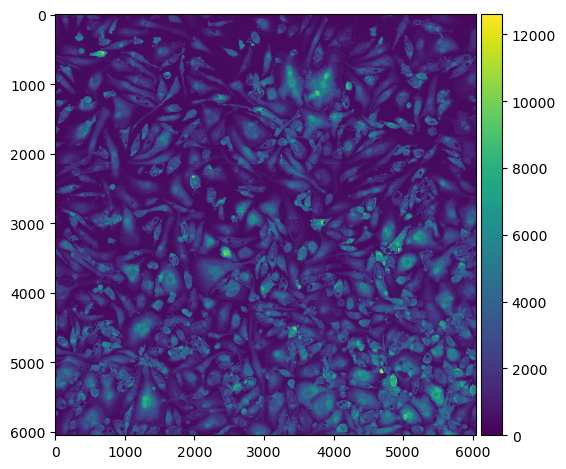

In [11]:
imshow(images[0,0,...])